### EXPLORING A DATASET
Before we can conduct data analysis, we must outline our goals and understand the information available through 3 different steps.
* Describing the variables in the heart disease data set.
* Loading the heart disease data.

### Method
Our objective is to conduct a multiclass classification with more than two categories to answer a predictive question: can we use the attributes of the patient available to us to predict and distinguish the presence of heart disease in the patient? Our Class will be num, the diagnosis of heart disease (angiographic disease status) ranging from 0 to 4:
* presence in severity (values 1,2,3,4) and,
* absence (value 0).  

Given the following attributes and its description:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
   * Value 1: typical angina
   * Value 2: atypical angina
   * Value 3: non-anginal pain
   * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
13. ca: number of major vessels (0-3) colored by flourosopy
14. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
15. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

We plan to conduct data analysis to build a classifier using three different predictors (variables/columns):
* age: age in years.* chol: serum cholestoral in mg/d.
* thalach: maximum heart rate achieved.


Each variable has been: is this a useful variable for prediction? Describe at least one way that you will visualize the results.

In [1]:
#loading in the library necessary
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# read data
cleveland <- read_csv("data/processed.cleveland.data", col_names = F)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# renaming variables for readability 
colnames(cleveland) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                                   "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
# filtering the heart disease data to only include our class and predictors
cleveland_filter <- cleveland |>
            select(age, chol, thalach, num) |>
            mutate(num = as_factor(num)) |>
            sample_n(300)
cleveland_filter

age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
74,269,121,0
54,188,113,2
50,233,163,1
⋮,⋮,⋮,⋮
54,286,116,3
44,233,179,0
44,242,149,0


In [5]:
# center and scaling the heart disease data
recipe <- recipe(num ~ ., data = cleveland_filter) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) |>
    prep()

scaled_cleveland <- bake(recipe, cleveland_filter)
scaled_cleveland

age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
2.15938654,0.4287038,-1.2438358,0
-0.05726346,-1.1322046,-1.5918430,2
-0.50059346,-0.2650333,0.5832021,1
⋮,⋮,⋮,⋮
-0.05726346,0.75630189,-1.46134034,3
-1.16558846,-0.26503326,1.27921656,0
-1.16558846,-0.09159899,-0.02581054,0


In [6]:
# create the TRAIN SET and TEST SET
set.seed(2000)

cleveland_split <- initial_split(cleveland_filter, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split) 
cleveland_test <- testing(cleveland_split)

### Preliminary Exploratory Data Analysis

In [7]:
# find the number and percentage of differing presense of heart disease observations in our data set

num_obs <- nrow(cleveland_train)
    cleveland_train |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs * 100
    )

num,count,percentage
<fct>,<int>,<dbl>
0,121,54.260090
1,41,18.385650
2,27,12.107623
3,28,12.556054
4,6,2.690583


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

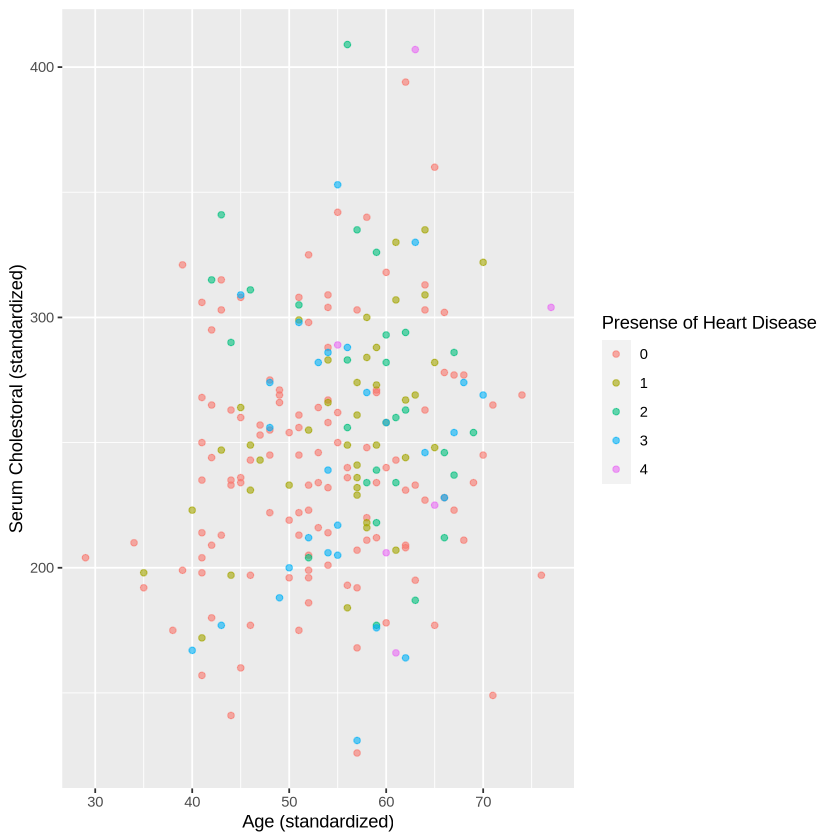

In [8]:
# draw a scatter plot to visualize the relationship between the chose age and chol (serum cholestoral in mg/d) predictors/variables
exploration_plot1 <- cleveland_train |>
  ggplot(aes(x = age, y = chol, color = num)) +
  geom_point(alpha = 0.6) +
  labs(x = "Age (standardized)",
       y = "Serum Cholestoral (standardized)",
       color = "Presense of Heart Disease")
  theme(text = element_text(size = 12))

exploration_plot1

In [9]:
# draw a scatter plot to visualize the relationship between the chose age and thalach (maximum heart rate achieved) predictors/variables


In [10]:
# draw a scatter plot to visualize the relationship between the chose chol (serum cholestoral in mg/d) and thalach (maximum heart rate achieved) predictors/variables
